In [134]:
import os
import pandas as pd
import datetime
import math
import numpy as np
import seaborn as sns
import matplotlib as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [135]:
os.chdir("C:\\Users\\paulo\\Documents\\RA and Fellowship Applications\\Data_Tests\\DChan Lab Hiring Data Test\\Task package")
mydata = pd.read_csv("test_data.txt")

In [136]:
# No missing Values
mydata.isna().sum()

ed_tc        0
dcord_tc     0
xb_lntdc     0
shiftid      0
phys_name    0
visit_num    0
dtype: int64

In [137]:
# It always marks the date with two symbols even if it is 1-9:
mydata.ed_tc.str.slice(start=0,stop=2).value_counts()

14    328
18    318
24    317
25    314
17    312
06    311
27    310
30    310
02    302
20    299
12    298
11    297
16    297
23    296
21    295
15    293
09    291
19    287
03    287
29    286
10    286
08    284
04    284
05    278
22    269
01    266
07    259
26    259
13    230
28    217
31    151
Name: shiftid, dtype: int64

In [138]:
mydata.dcord_tc.str.slice(start=0,stop=2).value_counts()

30    324
06    317
17    316
14    315
18    315
25    314
27    310
12    306
23    300
24    298
21    298
20    297
02    296
10    296
16    294
15    293
11    292
19    292
03    292
09    290
04    281
08    274
05    273
22    272
26    267
07    265
01    261
29    260
28    245
13    234
31    144
Name: dcord_tc, dtype: int64

In [139]:
mydata.shiftid.str.slice(start=0,stop=2).value_counts()

14    328
18    318
24    317
25    314
17    312
06    311
27    310
30    310
02    302
20    299
12    298
11    297
16    297
23    296
21    295
15    293
09    291
19    287
03    287
29    286
10    286
08    284
04    284
05    278
22    269
01    266
07    259
26    259
13    230
28    217
31    151
Name: shiftid, dtype: int64

In [140]:
# Code Date-Time Variables As Such
mydata.columns
mydata.ed_tc = mydata.ed_tc.str.title()
mydata.ed_tc = pd.to_datetime(mydata.ed_tc, format='%d%b%Y %H:%M:%S')
mydata.dcord_tc = mydata.dcord_tc.str.title()
mydata.dcord_tc = pd.to_datetime(mydata.dcord_tc, format='%d%b%Y %H:%M:%S')

mydata.shiftid = mydata.shiftid.str.replace('noon','12 p.m.')

mydata.shift_start = ''
mydata.shift_start = mydata.shiftid.str.slice(start=0,stop=10).str.title() + mydata.shiftid.str.slice(start=10,stop=17).str.upper()
mydata.shift_start =mydata.shift_start.str.replace('.','')
mydata.shift_start =mydata.shift_start.str.replace('  ',' ')
mydata.shift_start = mydata.shift_start.str.strip()
mydata.shift_start = pd.to_datetime(mydata.shift_start, format='%d%b%Y %I %p')

mydata.shift_end = ''
mydata.shift_end = mydata.shiftid.str.slice(start=0,stop=10).str.title()+ mydata.shiftid.str.slice(start=20,stop=27).str.upper()
mydata.shift_end =mydata.shift_end.str.replace('.','')
mydata.shift_end =mydata.shift_end.str.replace('  ',' ')
mydata.shift_end = mydata.shift_end.str.strip()
mydata.shift_end = pd.to_datetime(mydata.shift_end, format='%d%b%Y %I %p')

mydata['shift_start'] = mydata.shift_start
mydata['shift_end'] = mydata.shift_end

# Correcting the fact that overnight shifts have the incorrect day associated with them
mydata.loc[mydata['shift_end'] - mydata['shift_start'] < datetime.timedelta(minutes=0),['shift_end']] = mydata.loc[mydata['shift_end'] - mydata['shift_start'] < datetime.timedelta(minutes=0),['shift_end']] + datetime.timedelta(days=1)

In [141]:
# Summarize the data
mydata.describe(include='all')

,ed_tc,dcord_tc,xb_lntdc,shiftid,phys_name,visit_num,shift_start,shift_end
count,8831,8831,8831.000000,8831,8831,8831.000000,8831,8831
unique,7912,8162,NaN,398,43,NaN,381,381
top,1982-05-30 12:14:00,1982-06-20 13:18:00,NaN,06jun1982 8 a.m. to 5 p.m.,Whoopi,NaN,1982-06-06 08:00:00,1982-06-06 17:00:00
freq,4,4,NaN,54,417,NaN,54,54
first,1982-05-15 20:07:00,1982-05-15 22:34:00,NaN,NaN,NaN,NaN,1982-05-15 13:00:00,1982-05-15 22:00:00
last,1982-07-15 19:28:00,1982-07-16 10:17:00,NaN,NaN,NaN,NaN,1982-07-15 19:00:00,1982-07-16 04:00:00
mean,NaN,NaN,1.121157,NaN,NaN,4416.000000,NaN,NaN
std,NaN,NaN,0.381810,NaN,NaN,2549.434447,NaN,NaN
min,NaN,NaN,-0.275887,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,1.006444,NaN,NaN,2208.500000,NaN,NaN


In [142]:
# Number of unique doctors
len(mydata.phys_name.value_counts())

43

In [150]:
pd.Series(mydata['shift_end'] - mydata['shift_start']).value_counts()

09:00:00    7839
10:00:00     971
07:00:00      17
02:00:00       4
dtype: int64

In [143]:
# Looking for data entry errors
## All these values should be positive:
mydata['dcord_tc'] - mydata['ed_tc']

0      20:02:00
1      01:02:00
2      01:07:00
3      23:20:00
4      00:44:00
         ...   
8826   01:35:00
8827   07:09:00
8828   02:53:00
8829   01:48:00
8830   00:47:00
Length: 8831, dtype: timedelta64[ns]

In [144]:
min(mydata['dcord_tc'] - mydata['ed_tc'])

Timedelta('-1 days +22:11:00')

In [145]:
len(mydata[mydata['dcord_tc'] - mydata['ed_tc'] < datetime.timedelta(minutes=0)])

3

In [147]:
# Three people were discharged before they arrived!
mydata['shift_end'] - mydata['shift_start']

0      09:00:00
1      09:00:00
2      09:00:00
3      10:00:00
4      10:00:00
         ...   
8826   09:00:00
8827   09:00:00
8828   09:00:00
8829   10:00:00
8830   09:00:00
Length: 8831, dtype: timedelta64[ns]

In [148]:
min(mydata['shift_end'] - mydata['shift_start'])

Timedelta('0 days 02:00:00')

In [151]:
# Problem 1
len(mydata[mydata['ed_tc'] < mydata['shift_start']]) / len(mydata)

0.07360434831842373

In [152]:
len(mydata[mydata['dcord_tc'] > mydata['shift_end']]) / len(mydata)

0.18967274374363038

In [153]:
# Problem 2
# Patterns of Patient Arrivals
mydata['ed_tc'].groupby(mydata['ed_tc'].dt.hour).count()

ed_tc
0     132
1     114
2     143
3     156
4     345
5     409
6     620
7     617
8     617
9     504
10    572
11    520
12    574
13    568
14    518
15    442
16    465
17    377
18    294
19    230
20    161
21    161
22    138
23    154
Name: ed_tc, dtype: int64

In [154]:
# Patterns of Severity by Hour of Arrival
mydata['xb_lntdc'].groupby(mydata['ed_tc'].dt.hour).mean()

ed_tc
0     1.136666
1     1.144593
2     1.104160
3     1.120811
4     1.082213
5     1.091735
6     1.106814
7     1.145563
8     1.131713
9     1.139560
10    1.145184
11    1.109216
12    1.126599
13    1.115722
14    1.117335
15    1.098679
16    1.117958
17    1.125159
18    1.155606
19    1.114657
20    1.098382
21    1.130434
22    1.103896
23    1.131049
Name: xb_lntdc, dtype: float64

In [156]:
max(mydata['xb_lntdc'].groupby(mydata['ed_tc'].dt.hour).mean())

1.1556056197278903

In [157]:
min(mydata['xb_lntdc'].groupby(mydata['ed_tc'].dt.hour).mean())

1.0822129101449274

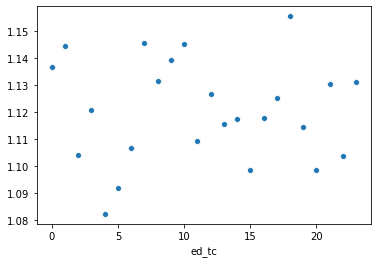

In [161]:
# Chart of log length of stay across hour of hospital admittance
sns.scatterplot(x=mydata['xb_lntdc'].groupby(mydata['ed_tc'].dt.hour).mean().index, y=mydata['xb_lntdc'].groupby(mydata['ed_tc'].dt.hour).mean().values);

In [162]:
# Problem 3
census = pd.DataFrame()
hour = min(mydata['shift_start'])

while hour <= max(mydata['shift_end']) + datetime.timedelta(hours = 4):
    on_call = pd.DataFrame(mydata[(mydata['shift_start'] <= hour) & (mydata['shift_end'] + datetime.timedelta(hours=4)> hour)].groupby(['phys_name', 'shiftid','shift_end']).count()['ed_tc'])
    patients = mydata[(mydata['ed_tc'] <= hour) & (mydata['dcord_tc']> hour)].groupby(['phys_name', 'shiftid','shift_end']).count()['ed_tc']
    x = on_call.merge(patients,how='left',on=['phys_name','shiftid','shift_end'])['ed_tc_y'].fillna(0).reset_index()
    x['index'] = (hour - x['shift_end']).astype('timedelta64[h]')
    census = census.append(x, ignore_index=True)
    hour = hour + datetime.timedelta(hours = 1)

census['patient_count'] = census['ed_tc_y']

del census['ed_tc_y']
del census['shift_end']

In [163]:
census.to_csv("census.csv")

In [164]:
census.groupby('index').count()['patient_count']

index
-10.0     48
-9.0     528
-8.0     528
-7.0     529
-6.0     529
-5.0     529
-4.0     529
-3.0     529
-2.0     530
-1.0     530
 0.0     530
 1.0     530
 2.0     530
 3.0     530
Name: patient_count, dtype: int64

In [165]:
census.groupby('index').mean()['patient_count']

index
-10.0    0.958333
-9.0     1.488636
-8.0     3.465909
-7.0     4.886578
-6.0     6.189036
-5.0     7.534972
-4.0     7.922495
-3.0     7.319471
-2.0     6.350943
-1.0     4.756604
 0.0     3.160377
 1.0     2.273585
 2.0     1.718868
 3.0     1.386792
Name: patient_count, dtype: float64

In [92]:
# Problem 4
mydata['shift_start_hour'] = mydata['shift_start'].dt.hour
mydata.groupby('shift_start_hour').mean()['xb_lntdc']

shift_start_hour
3     1.107284
4     1.120513
6     1.025745
8     1.148458
10    1.009690
11    1.075082
12    1.103813
13    1.137141
19    1.159107
Name: xb_lntdc, dtype: float64

In [171]:
results1 = smf.ols('xb_lntdc ~ phys_name', data=mydata).fit()
results1.params.sort_values()[0:10]

phys_name[T.Teresa]      -0.103518
phys_name[T.Elizabeth]   -0.074584
phys_name[T.Andrew]      -0.072734
phys_name[T.Dwight]      -0.070887
phys_name[T.Diana]       -0.062446
phys_name[T.Barack]      -0.060750
phys_name[T.Benazir]     -0.056431
phys_name[T.Thomas]      -0.051839
phys_name[T.Ronald]      -0.048312
phys_name[T.Beatrix]     -0.046338
dtype: float64

In [174]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:               xb_lntdc   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.489
Date:                Thu, 12 Nov 2020   Prob (F-statistic):             0.0219
Time:                        15:15:51   Log-Likelihood:                -3996.1
No. Observations:                8831   AIC:                             8078.
Df Residuals:                    8788   BIC:                             8383.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [172]:
results2 = smf.ols('xb_lntdc ~ phys_name + C(shift_start.dt.hour)', data=mydata).fit()
results2.params.sort_values()[0:10]

C(shift_start.dt.hour)[T.10]   -0.095110
phys_name[T.Teresa]            -0.094587
C(shift_start.dt.hour)[T.6]    -0.072503
phys_name[T.Dwight]            -0.062760
phys_name[T.Elizabeth]         -0.059436
phys_name[T.Diana]             -0.058706
phys_name[T.Andrew]            -0.053672
phys_name[T.Beatrix]           -0.045309
phys_name[T.Ronald]            -0.039388
phys_name[T.Benazir]           -0.036527
dtype: float64

In [168]:
results3 = smf.ols('xb_lntdc ~ phys_name + C(shift_end.dt.hour)', data=mydata).fit()
results3.params.sort_values()[0:10]

C(shift_end.dt.hour)[T.16]   -0.129331
C(shift_end.dt.hour)[T.10]   -0.110824
phys_name[T.Teresa]          -0.095376
C(shift_end.dt.hour)[T.20]   -0.080091
phys_name[T.Dwight]          -0.064215
phys_name[T.Diana]           -0.058523
phys_name[T.Elizabeth]       -0.057586
C(shift_end.dt.hour)[T.13]   -0.054193
phys_name[T.Andrew]          -0.053164
C(shift_end.dt.hour)[T.12]   -0.052486
dtype: float64

In [169]:
results4 = smf.ols('xb_lntdc ~ phys_name + C(ed_tc.dt.hour)', data=mydata).fit()
results4.params.sort_values()[0:10]

phys_name[T.Teresa]      -0.105185
phys_name[T.Elizabeth]   -0.073743
phys_name[T.Andrew]      -0.070945
phys_name[T.Dwight]      -0.070408
phys_name[T.Diana]       -0.061980
phys_name[T.Barack]      -0.056825
phys_name[T.Benazir]     -0.051202
C(ed_tc.dt.hour)[T.4]    -0.049698
phys_name[T.Ronald]      -0.046639
phys_name[T.Beatrix]     -0.045595
dtype: float64

In [170]:
results5 = smf.ols('xb_lntdc ~ phys_name + C(dcord_tc.dt.hour)', data=mydata).fit()
results5.params.sort_values()[0:10]

C(dcord_tc.dt.hour)[T.7]   -0.106546
phys_name[T.Teresa]        -0.106073
C(dcord_tc.dt.hour)[T.5]   -0.101132
C(dcord_tc.dt.hour)[T.6]   -0.090361
phys_name[T.Andrew]        -0.080082
phys_name[T.Elizabeth]     -0.080020
phys_name[T.Dwight]        -0.078810
C(dcord_tc.dt.hour)[T.8]   -0.075015
phys_name[T.Diana]         -0.072009
C(dcord_tc.dt.hour)[T.9]   -0.067175
dtype: float64

In [97]:
# Lower numbers are quicker.
mydata.groupby('phys_name').mean()['xb_lntdc'].sort_values()

phys_name
Teresa        1.040844
Elizabeth     1.069778
Andrew        1.071628
Dwight        1.073475
Diana         1.081916
Barack        1.083612
Benazir       1.087931
Thomas        1.092523
Ronald        1.096050
Beatrix       1.098024
Anne          1.099694
James         1.105260
Ingrid        1.106833
Gerald        1.108921
Lyndon        1.111256
William       1.111939
Herbert       1.113923
Virginia      1.115351
Whoopi        1.115696
Grover        1.120614
Warren        1.122390
Franklin      1.123333
Bill          1.125254
Martin        1.126367
John          1.126604
Benjamin      1.129426
Audrey        1.130615
Calvin        1.135424
Chester       1.136003
Harry         1.136911
Kate          1.137052
Abraham       1.144362
Oprah         1.144983
Woodrow       1.149092
Richard       1.160650
Katharine     1.169889
Jimmy         1.172943
Hillary       1.179951
George        1.184337
Ulysses       1.184818
Jacqueline    1.191636
Eleanor       1.210528
Victoria      1.303968
N

In [101]:
mydata.groupby('phys_name').count()['xb_lntdc'].sort_values()

phys_name
Victoria        2
Thomas         24
Katharine      65
Elizabeth      90
Chester       110
Eleanor       116
Richard       128
Jacqueline    128
Teresa        129
James         148
Ulysses       149
Herbert       150
William       156
Ronald        159
Kate          171
Woodrow       173
Grover        179
Hillary       182
Anne          182
George        183
Franklin      187
Jimmy         188
Benazir       190
Lyndon        194
Abraham       201
John          203
Oprah         203
Andrew        223
Bill          234
Barack        244
Audrey        259
Virginia      269
Benjamin      278
Warren        283
Martin        293
Diana         299
Calvin        299
Ingrid        312
Harry         324
Dwight        326
Gerald        369
Beatrix       412
Whoopi        417
Name: xb_lntdc, dtype: int64

In [103]:
mydata.groupby('phys_name').count()['xb_lntdc'].mean()

205.37209302325581